In [1]:
# Standard libraries to handle data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# To evaluate and select model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

# Load data and explore

## EDA

In [2]:
# Download test and train 
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing values

In [6]:
# Count all missing values
train_df.isnull().sum().sum() 

7829

In [7]:
columns_with_missing_values = []
for column in train_df.columns:
    if train_df[column].isnull().sum() > 0:
        columns_with_missing_values.append(column)
for column in columns_with_missing_values:
    print(f"column: {column} has {train_df[column].isnull().sum()} missing values")

column: LotFrontage has 259 missing values
column: Alley has 1369 missing values
column: MasVnrType has 872 missing values
column: MasVnrArea has 8 missing values
column: BsmtQual has 37 missing values
column: BsmtCond has 37 missing values
column: BsmtExposure has 38 missing values
column: BsmtFinType1 has 37 missing values
column: BsmtFinType2 has 38 missing values
column: Electrical has 1 missing values
column: FireplaceQu has 690 missing values
column: GarageType has 81 missing values
column: GarageYrBlt has 81 missing values
column: GarageFinish has 81 missing values
column: GarageQual has 81 missing values
column: GarageCond has 81 missing values
column: PoolQC has 1453 missing values
column: Fence has 1179 missing values
column: MiscFeature has 1406 missing values


## Columns info

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Distribution of target value

Text(0.5, 1.0, 'Histplot for SalePrice')

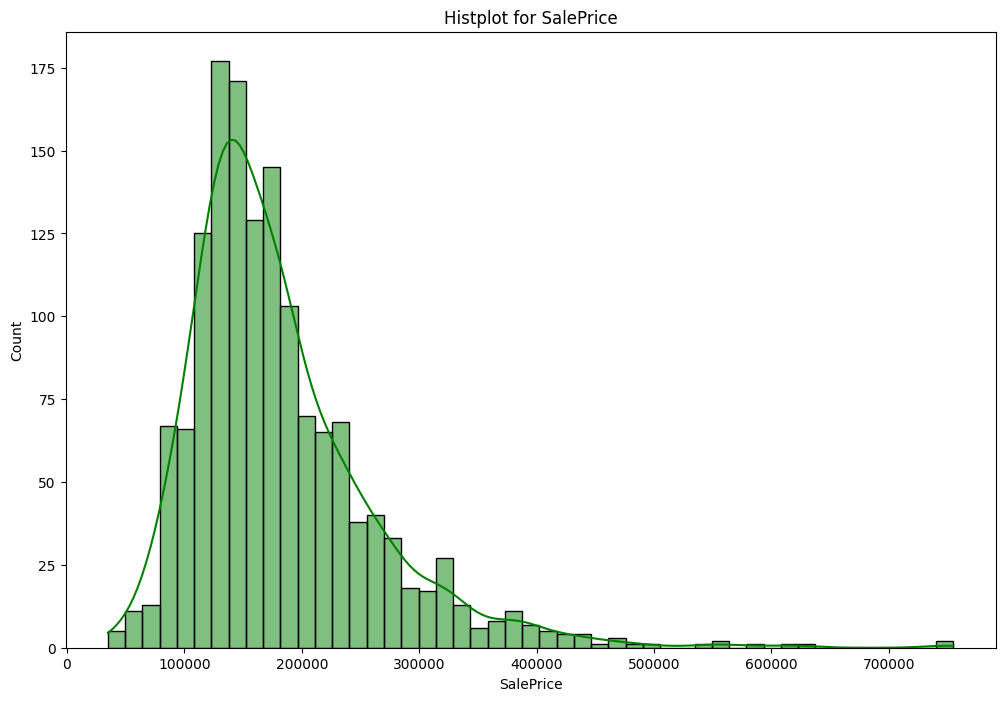

In [10]:
sale_price = train_df['SalePrice']
plt.figure(figsize=(12,8), dpi=100)
sns.histplot(sale_price, color='green', kde=True)
plt.title('Histplot for SalePrice')

<Axes: ylabel='SalePrice'>

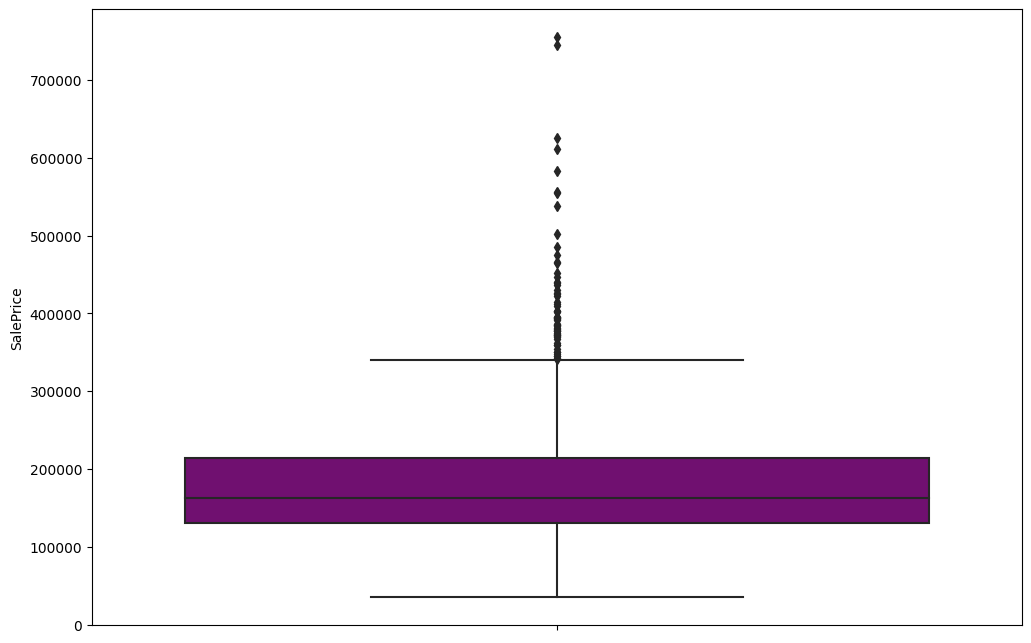

In [11]:
plt.figure(figsize=(12,8), dpi=100)
sns.boxplot(y=sale_price, color='purple')

# Vizualization and working with missing values for train_df 

In [12]:
# Function to check missing values in every stage
def count_missing_values(df):
    missing_values = df.isna().sum().to_frame()
    missing_values = missing_values[missing_values > 0].dropna()
    missing_values[0] = (100 * missing_values[0]) / len(train_df) # counting percents
    missing_values = missing_values.reset_index().sort_values(by=0)
    return missing_values

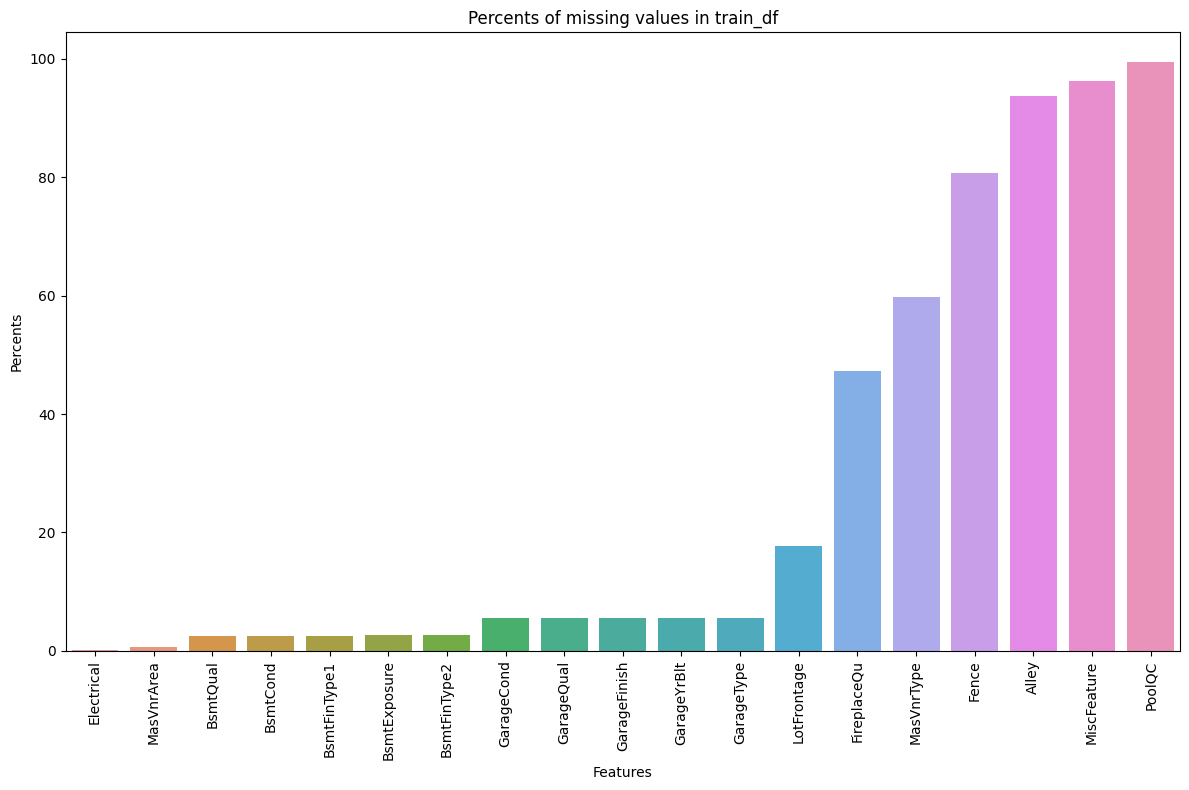

In [13]:
missing_values = count_missing_values(train_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in train_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.xticks(rotation=90)
plt.tight_layout()

I'm deleting columns either with too big missing percent or too small percent

In [14]:
train_df.dropna(subset = 'Electrical', inplace = True)
train_df['Electrical'].isna().sum()

0

In [15]:
train_df.drop(columns = ['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis = 1, inplace = True)
len(train_df.columns)

77

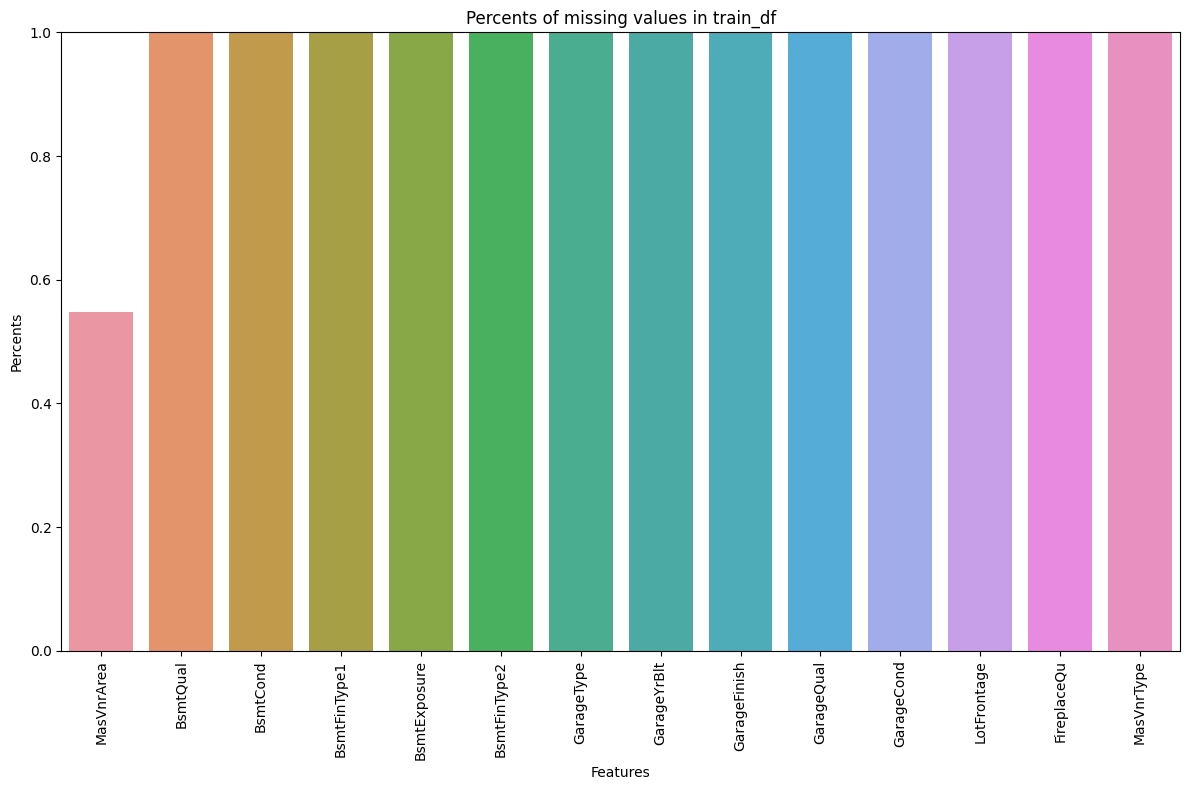

In [16]:
missing_values = count_missing_values(train_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in train_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()

In [17]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['MasVnrArea'].isnull().sum()

0

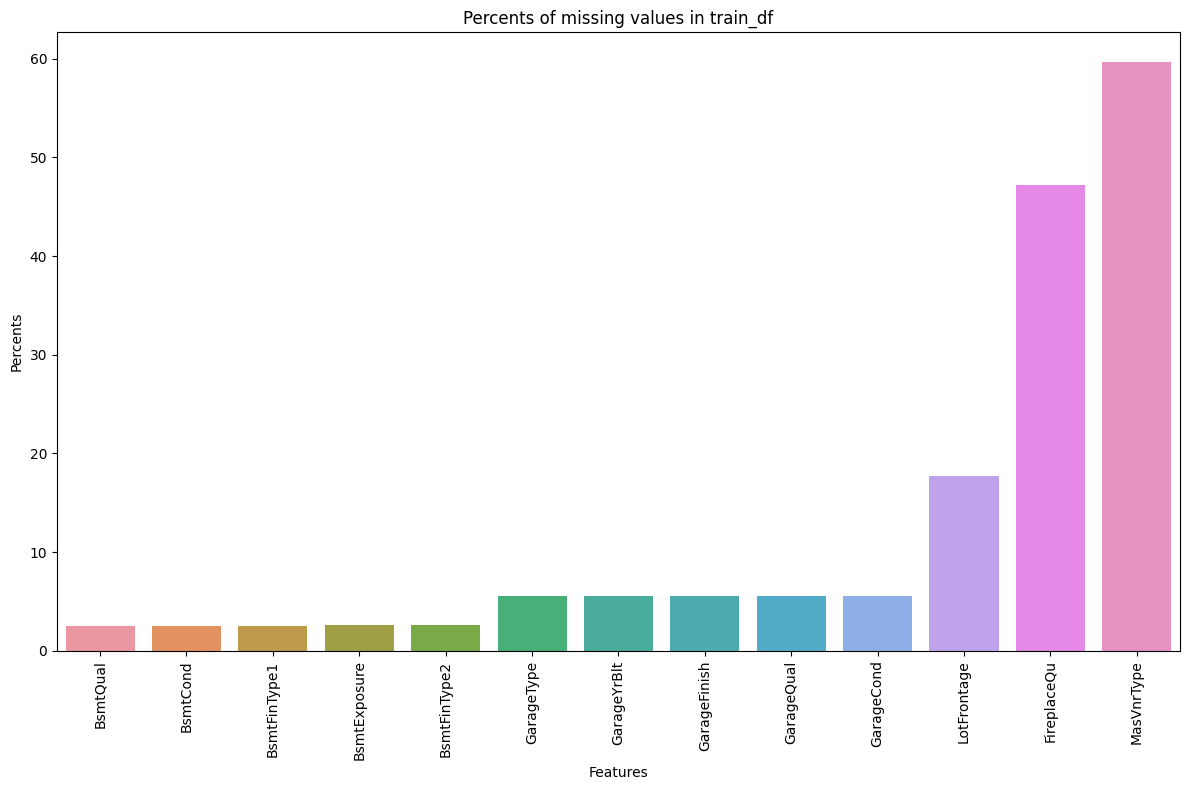

In [18]:
missing_values = count_missing_values(train_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in train_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.xticks(rotation=90)
plt.tight_layout()

In [19]:
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
train_df[basement_columns] = train_df[basement_columns].fillna(value='None')

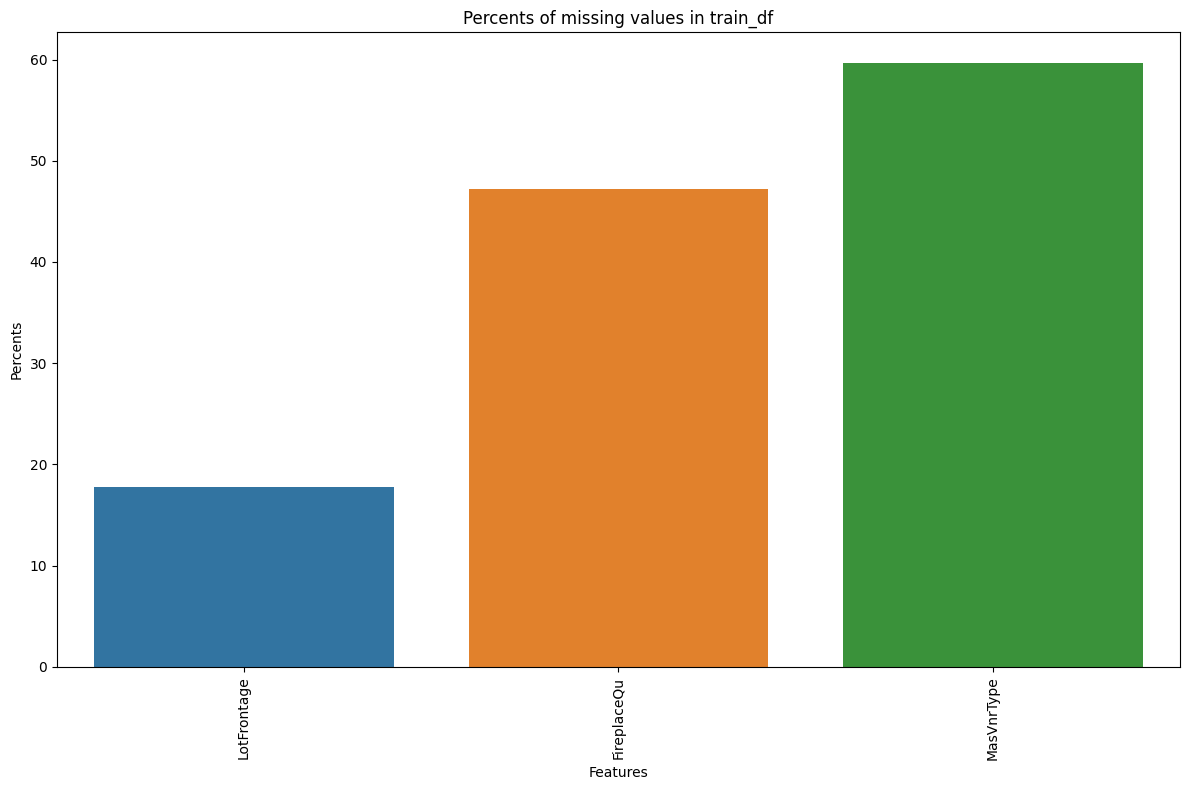

In [20]:
missing_values = count_missing_values(train_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in train_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.xticks(rotation=90)
plt.tight_layout()

In [21]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
train_df['MasVnrType'].isnull().sum()

0

In [22]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')
train_df['FireplaceQu'].isnull().sum()

0

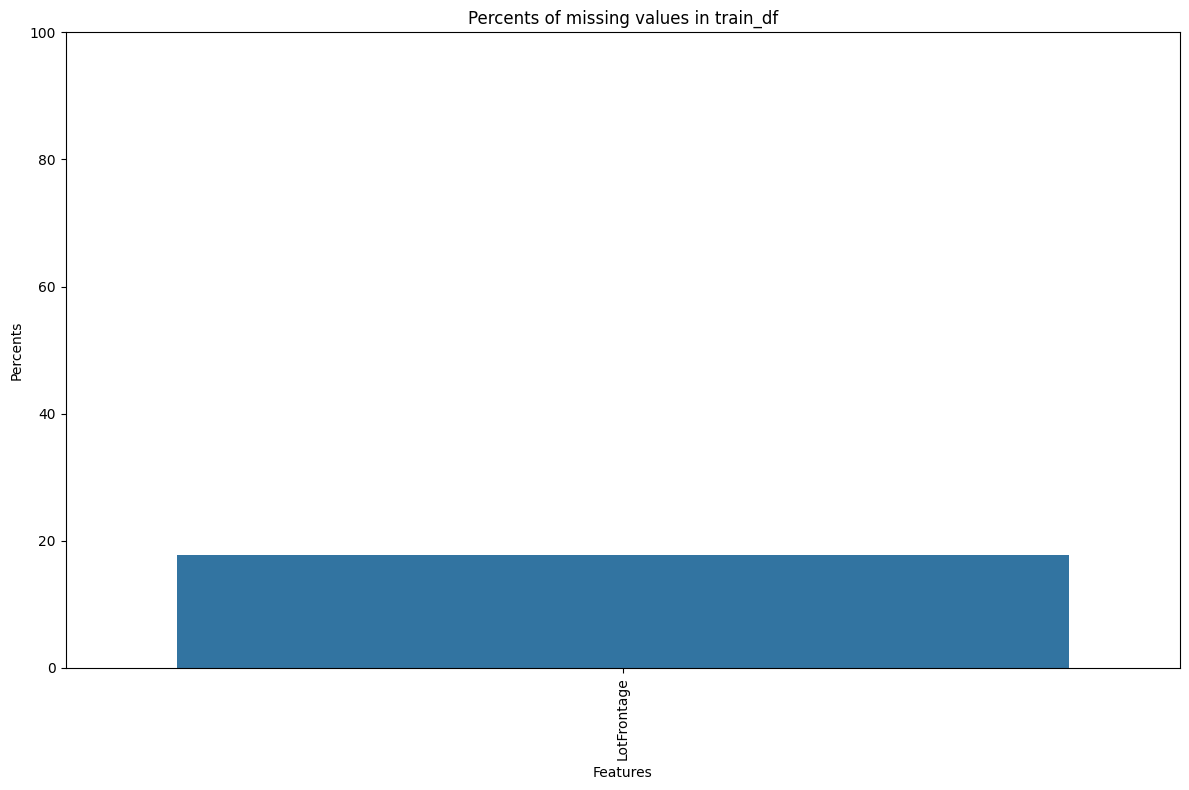

In [23]:
missing_values = count_missing_values(train_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in train_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()

In [24]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
train_df['LotFrontage'].isnull().sum()

0

In [25]:
count_missing_values(train_df)

,index,0


In [26]:
# We don't need a column with an id
train_df.drop('Id', axis = 1, inplace=True)

# Vizualization and working with missing values for test_df 

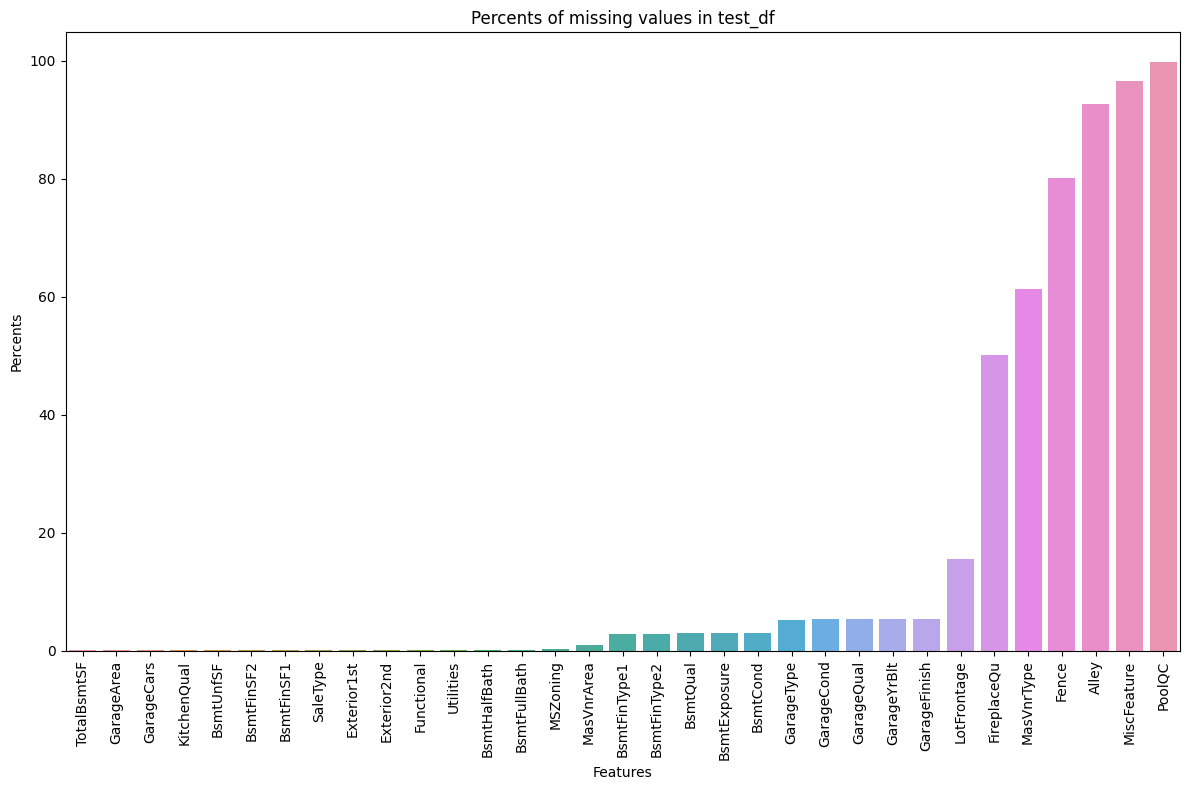

In [27]:
missing_values = count_missing_values(test_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in test_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.xticks(rotation=90)
plt.tight_layout()

We carry out the same transformations as in the train_df

In [28]:
test_df.dropna(subset = 'Electrical', inplace = True)
test_df['Electrical'].isna().sum()

0

In [29]:
test_df.drop(columns = ['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis = 1, inplace = True)
len(test_df.columns)

76

In [30]:
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
test_df[basement_columns] = test_df[basement_columns].fillna(value='None')

In [31]:
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')
test_df['MasVnrType'].isnull().sum()

0

In [32]:
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')
test_df['FireplaceQu'].isnull().sum()

0

In [33]:
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
test_df['LotFrontage'].isnull().sum()

0

In [34]:
test_df.drop('Id', axis = 1, inplace=True)

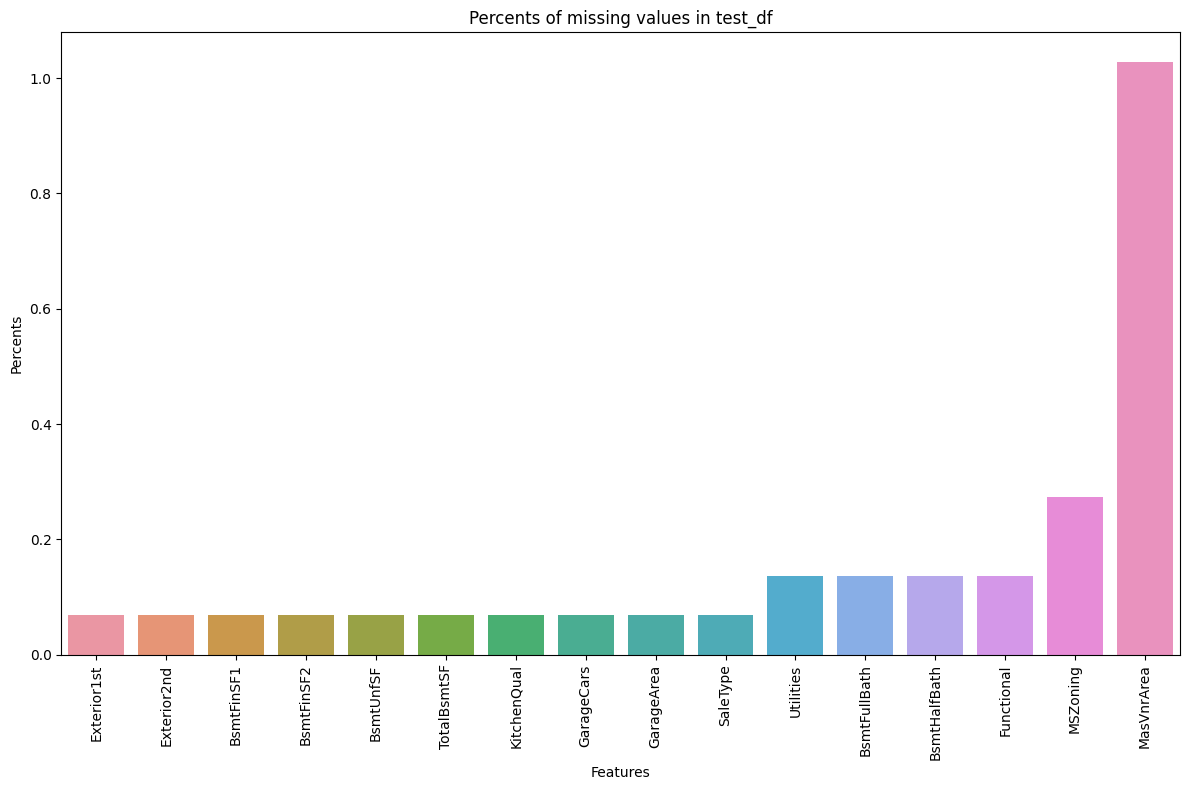

In [35]:
missing_values = count_missing_values(test_df)
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values['index'], y=missing_values[0])
plt.title('Percents of missing values in test_df')
plt.xlabel('Features')
plt.ylabel('Percents')
plt.xticks(rotation=90)
plt.tight_layout()

In [36]:
real_values = test_df.select_dtypes(exclude=['object'])
str_values = test_df.select_dtypes(include=['object'])

real_values.fillna(real_values.mean(), inplace=True)
for col in str_values.columns:
    mode = str_values[col].mode()[0]
    str_values[col].fillna(mode, inplace=True)

In [37]:
count_missing_values(str_values)

,index,0


In [38]:
count_missing_values(real_values)

,index,0


In [39]:
test_df = pd.concat([real_values, str_values], axis=1)
test_df.shape

(1459, 75)

In [40]:
train_df.shape

(1459, 76)

# Features engineering

In [41]:
train_df['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [42]:
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)

In [43]:
train_str_values = train_df.select_dtypes(include=['object'])
train_real_values = train_df.select_dtypes(exclude=['object'])

test_str_values = test_df.select_dtypes(include=['object'])
test_real_values = test_df.select_dtypes(exclude=['object'])

In [44]:
train_str_values.shape

(1459, 41)

In [45]:
test_str_values.shape

(1459, 41)

In [46]:
combined_str_values = pd.concat([train_str_values, test_str_values], axis=0)
combined_dummies = pd.get_dummies(combined_str_values, drop_first=True, dtype='int')
str_values_train_with_dummies = combined_dummies.iloc[:train_str_values.shape[0], :].reset_index(drop=True)
str_values_test_with_dummies = combined_dummies.iloc[train_str_values.shape[0]:, :].reset_index(drop=True)

In [47]:
final_train_df = pd.concat([str_values_train_with_dummies.reset_index(drop=True), train_real_values.reset_index(drop=True)], axis=1)
final_test_df = pd.concat([str_values_test_with_dummies.reset_index(drop=True), test_real_values.reset_index(drop=True)], axis=1)

# Modeling Linear Regression

## Validation stage

In [48]:
X_train = final_train_df.drop('SalePrice', axis=1)
y_train = final_train_df['SalePrice']

X_test = final_test_df

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.transform(X_val)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

(-100000.0, 100000.0)

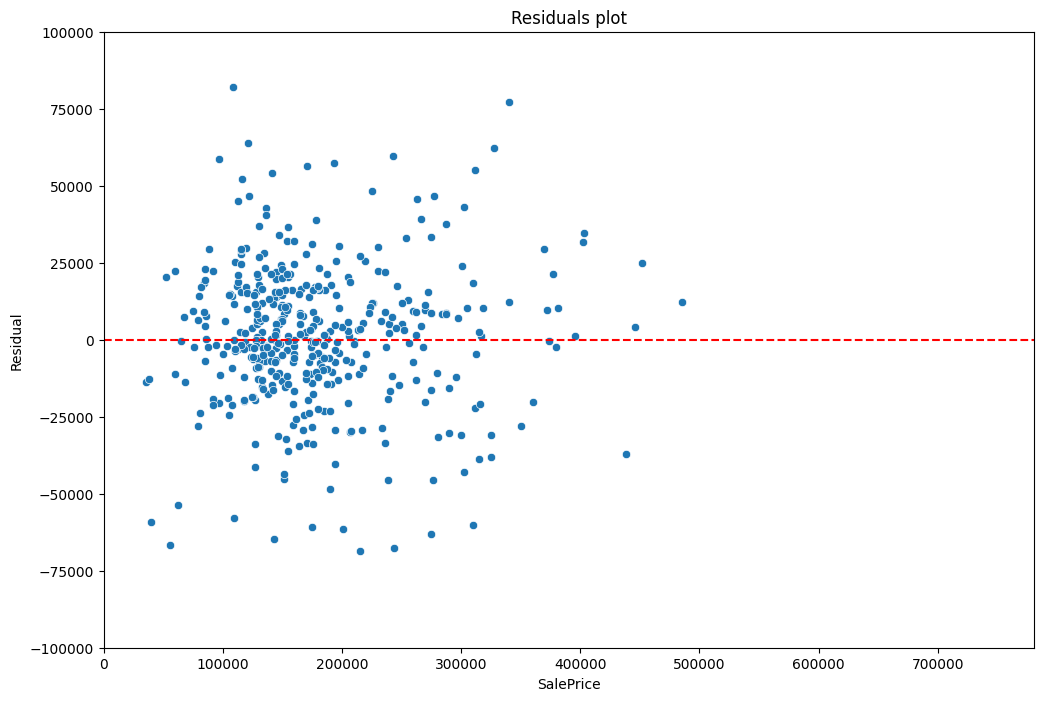

In [50]:
residuals = y_val - y_pred
plt.figure(figsize=(12, 8), dpi=100)
sns.scatterplot(x=y_val, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals plot")
plt.xlabel('SalePrice')
plt.ylabel('Residual')
plt.ylim(-np.power(10, 5), np.power(10, 5))

In [51]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

model = LinearRegression()

scores = cross_validate(model, X_train, y_train, 
                        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'max_error'], 
                        cv=10)

In [52]:
pd.DataFrame(scores).mean()

fit_time                        9.858198e-02
score_time                      4.812884e-03
test_neg_mean_squared_error    -2.340779e+35
test_neg_mean_absolute_error   -4.084396e+16
test_max_error                 -1.597103e+18
dtype: float64

# Modeling ElasticNet

## Validation stage

In [53]:
X_train = final_train_df.drop('SalePrice', axis=1)
y_train = final_train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.transform(X_val)

In [54]:
model = ElasticNet()
params_dict = {'alpha': [0.1, 1, 10, 50, 90, 100],
         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.99, 1]}

In [55]:
grid_search_elastic_model = GridSearchCV(estimator=model,
                                     param_grid=params_dict,
                                     scoring='neg_mean_squared_error',
                                     cv=5,
                                     verbose=0)

In [56]:
import warnings
warnings.filterwarnings("ignore")
grid_search_elastic_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 90, 100],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [57]:
grid_search_elastic_model.best_params_

{'alpha': 90, 'l1_ratio': 0.99}

In [58]:
y_pred = grid_search_elastic_model.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}")
print(f"MAE: {mean_absolute_error(y_val, y_pred)}")

MSE: 899854149.5518738
RMSE: 29997.5690607068
MAE: 17407.43305526672


# Polynomial Regression

## Validation stage

In [59]:
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# split into real and string values
train_str_values = X_train.select_dtypes(include=['object'])
train_real_values = X_train.select_dtypes(exclude=['object'])

val_str_values = X_val.select_dtypes(include=['object'])
val_real_values = X_val.select_dtypes(exclude=['object'])

# One-hot-encoding
combined_str_values = pd.concat([train_str_values, val_str_values], axis=0)
combined_dummies = pd.get_dummies(combined_str_values, drop_first=True, dtype='int')
str_values_train_with_dummies = combined_dummies.iloc[:train_str_values.shape[0], :].reset_index(drop=True)
str_values_val_with_dummies = combined_dummies.iloc[train_str_values.shape[0]:, :].reset_index(drop=True)

train_rmse_scores = []
val_rmse_scores = []
train_mae_scores = []
val_mae_scores = []

for i in range(1, 6):
    # Make new real features
    polynomial = PolynomialFeatures(degree=i, include_bias=False)
    poly_train_features = polynomial.fit_transform(train_real_values)
    poly_val_features = polynomial.transform(val_real_values)

    # Convert to df and convert columns names to string
    poly_train_features_df = pd.DataFrame(poly_train_features, index=train_real_values.index) 
    poly_val_features_df = pd.DataFrame(poly_val_features, index=val_real_values.index) 
    poly_train_features_df.columns = poly_train_features_df.columns.astype(str)
    poly_val_features_df.columns = poly_val_features_df.columns.astype(str)
    
    # Merge data
    X_train = pd.concat([poly_train_features_df.reset_index(drop=True), str_values_train_with_dummies.reset_index(drop=True)], axis=1)
    X_val = pd.concat([poly_val_features_df.reset_index(drop=True), str_values_val_with_dummies.reset_index(drop=True)], axis=1)
    
    # Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Make model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    train_mae_scores.append(mean_absolute_error(y_train, y_train_pred))
    val_mae_scores.append(mean_absolute_error(y_val, y_val_pred))

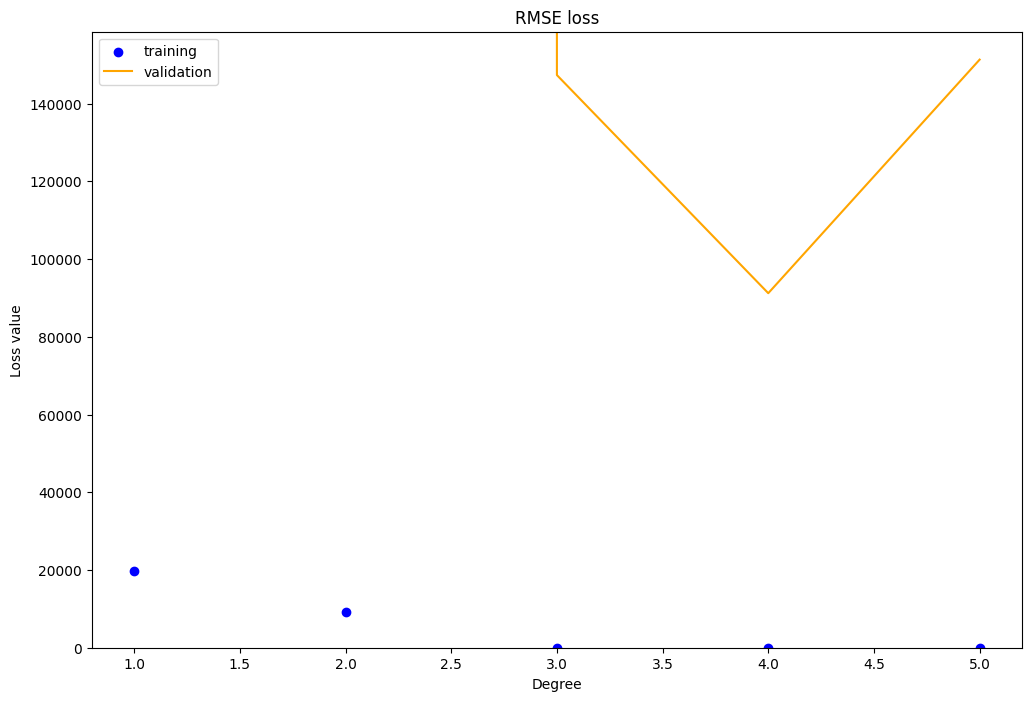

In [60]:
plt.figure(figsize=(12,8), dpi=100)
plt.scatter(range(1, 6), train_rmse_scores, color='blue', marker='o', label='training')
plt.plot(range(1, 6), val_rmse_scores, color='orange', label='validation')
plt.xlabel('Degree')
plt.ylabel('Loss value')
plt.ylim(0, np.power(10, 5.2))
plt.title('RMSE loss')
plt.legend()

In [61]:
min(train_rmse_scores)

6.116867066013997e-10

In [62]:
min(val_rmse_scores)

91216.02443391204

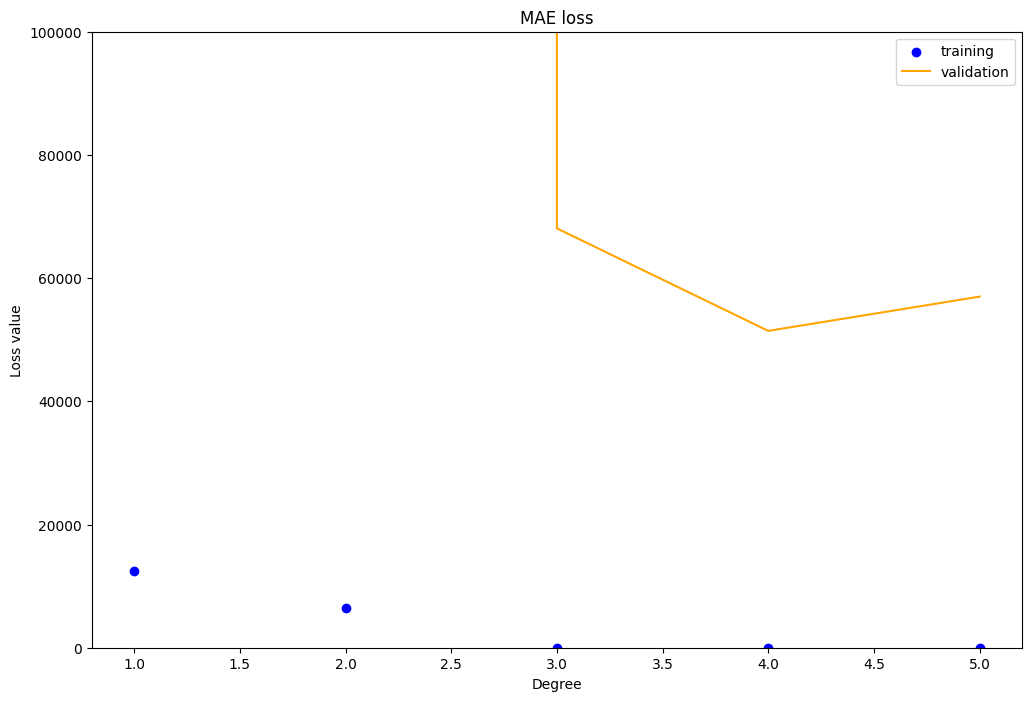

In [63]:
plt.figure(figsize=(12,8), dpi=100)
plt.scatter(range(1, 6), train_mae_scores, color='blue', marker='o', label='training')
plt.plot(range(1, 6), val_mae_scores, color='orange', label='validation')
plt.xlabel('Degree')
plt.ylabel('Loss value')
plt.ylim(0, np.power(10, 5))
plt.title('MAE loss')
plt.legend()

In [64]:
min(train_mae_scores)

4.04332304714534e-10

In [65]:
min(val_mae_scores)

51435.20248236655

# ElasticNet full train

In [66]:
import warnings
warnings.filterwarnings("ignore")

# Split data
X_train = final_train_df.drop('SalePrice', axis=1)
y_train = final_train_df['SalePrice']
X_test = final_test_df

# Scaling
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

# Make model
model = ElasticNet()
params_dict = {'alpha': [0.1, 1, 10, 50, 90, 100],
         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.99, 1]}

grid_search_elastic_model = GridSearchCV(estimator=model,
                                     param_grid=params_dict,
                                     scoring='neg_mean_squared_error',
                                     cv=5,
                                     verbose=0)

grid_search_elastic_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 90, 100],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [67]:
grid_search_elastic_model.best_params_

{'alpha': 50, 'l1_ratio': 0.99}

In [68]:
y_pred = grid_search_elastic_model.predict(X_test)

# Download results

In [69]:
output = pd.DataFrame({'Id': range(1461, 2920),
                       'SalePrice': y_pred})
output

,Id,SalePrice
0,1461,106759.624022
1,1462,155932.451575
2,1463,183841.452235
3,1464,200882.834145
4,1465,202830.861201
...,...,...
1454,2915,78707.548529
1455,2916,79600.998100
1456,2917,176420.885852
1457,2918,112363.924706


In [70]:
output.to_csv('submission.csv', index=False)